In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Analysis ##

In [2]:
# load steel model results
path = "../data/results/steel_fourier/"
steel_all_noise_df = pd.read_csv(f"{path}best_steel_fourier_model-all_results.csv")
steel_average_noise_df = pd.read_csv(
    f"{path}best_steel_fourier_model-average_results.csv"
)
steel_blackbox_noise_df = pd.read_csv(
    f"{path}best_steel_fourier_model-blackbox_results.csv"
)
steel_bubble_noise_df = pd.read_csv(
    f"{path}best_steel_fourier_model-bubble_results.csv"
)
steel_pizza_noise_df = pd.read_csv(f"{path}best_steel_fourier_model-pizza_results.csv")
steel_pure_noise_df = pd.read_csv(f"{path}best_steel_fourier_model-pure_results.csv")

steels = {
    "all_steel": steel_all_noise_df,
    "average_steel": steel_average_noise_df,
    "blackbox_noise": steel_blackbox_noise_df,
    "bubble_noise": steel_bubble_noise_df,
    "triangle_noise": steel_pizza_noise_df,
    "pure_noise": steel_pure_noise_df,
}

In [3]:
# Load results for the exact method
exact_path = "../data/results/exact_method/"
exact_blackbox_noise_df = pd.read_csv(
    f"{exact_path}exact_method-blackbox_noise_results.csv"
)
exact_bubble_noise_df = pd.read_csv(
    f"{exact_path}exact_method-bubble_noise_results.csv"
)
exact_pizza_noise_df = pd.read_csv(f"{exact_path}exact_method-pizza_noise_results.csv")
exact_pure_noise_df = pd.read_csv(f"{exact_path}exact_method-pure_noise_results.csv")
exact_all_steel_df = pd.read_csv(f"{exact_path}exact_method-steel_fourier_results.csv")
exact_average_steel_df = pd.read_csv(
    f"{exact_path}exact_method-steel_fourier_single_results.csv"
)

exact_dfs = {
    "all_steel": exact_all_steel_df,
    "average_steel": exact_average_steel_df,
    "blackbox_noise": exact_blackbox_noise_df,
    "bubble_noise": exact_bubble_noise_df,
    "triangle_noise": exact_pizza_noise_df,
    "pure_noise": exact_pure_noise_df,
}

In [4]:
def adjusted_plot_loss_distribution(df):
    # Calculate the adjusted loss based on the new logic
    def calculate_adjusted_loss(row):
        # Calculate the absolute difference
        absolute_difference = abs(row["predicted"] - row["epsilon"])
        # Considering the cyclic nature, find the minimum difference
        adjusted_loss = min(absolute_difference, 1 - absolute_difference)

        # Determine if it's an underestimation or overestimation
        if row["predicted"] < row["epsilon"]:
            if (
                row["epsilon"] - row["predicted"] > 0.5
            ):  # the values are on opposite sides of the cycle
                adjusted_loss = abs(adjusted_loss)  # it's an overestimation
            else:
                adjusted_loss = -abs(adjusted_loss)  # it's an underestimation
        else:
            if (
                row["predicted"] - row["epsilon"] > 0.5
            ):  # the values are on opposite sides of the cycle
                adjusted_loss = -abs(adjusted_loss)  # it's an underestimation
            else:
                adjusted_loss = abs(adjusted_loss)  # it's an overestimation

        return adjusted_loss

    df["adjusted_loss"] = df.apply(calculate_adjusted_loss, axis=1)

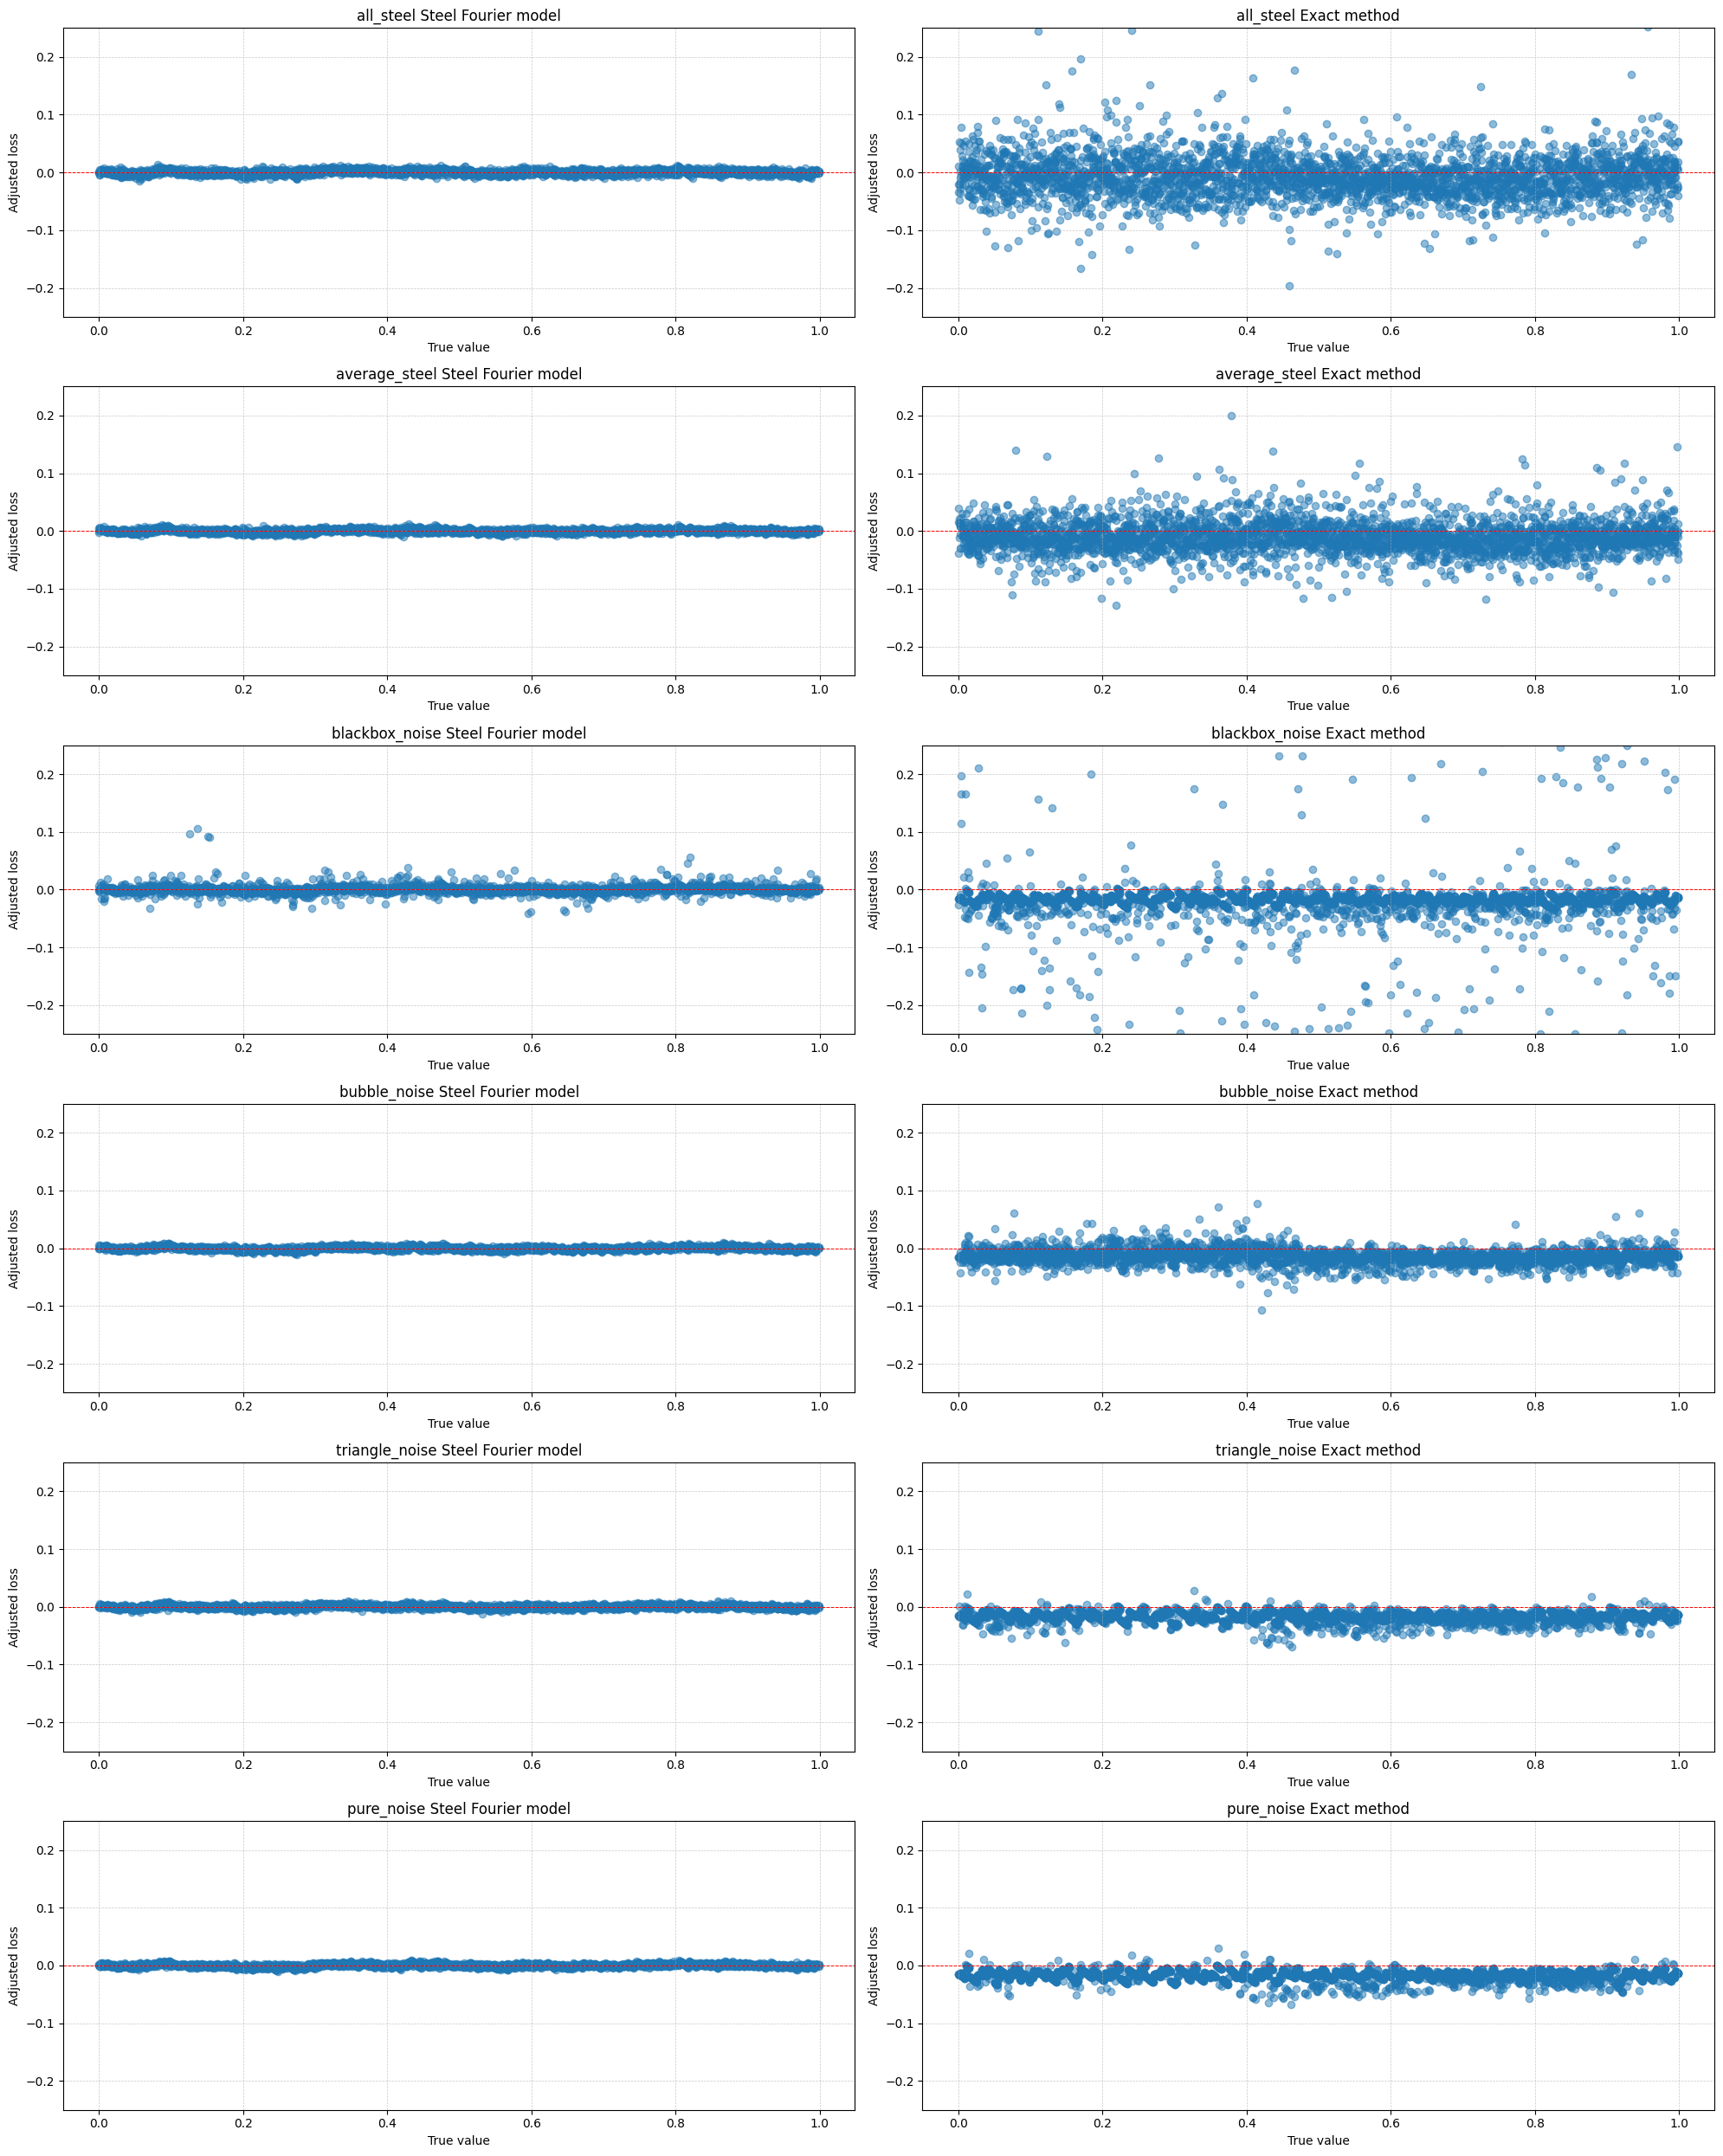

In [5]:
# in each row plot the loss distribution for the steel mode, ceramic model and general model for a given dataset
fig, axs = plt.subplots(6, 2, figsize=(20, 25))  # Adjust the figure size as needed

keys = list(steels.keys())
y_limit = 0.25
for i, key in enumerate(keys):
    steel_df = steels[key]
    exact_df = exact_dfs[key]

    adjusted_plot_loss_distribution(steel_df)
    adjusted_plot_loss_distribution(exact_df)

    axs[i, 0].scatter(steel_df["epsilon"], steel_df["adjusted_loss"], alpha=0.5)
    axs[i, 0].axhline(0, color="r", linestyle="--", linewidth=0.7)
    axs[i, 0].set_title(f"{key} Steel Fourier model")
    axs[i, 0].set_xlabel("True value")
    axs[i, 0].set_ylabel("Adjusted loss")
    axs[i, 0].set_ylim(-y_limit, y_limit)
    axs[i, 0].grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)

    axs[i, 1].scatter(exact_df["epsilon"], exact_df["adjusted_loss"], alpha=0.5)
    axs[i, 1].axhline(0, color="r", linestyle="--", linewidth=0.7)
    axs[i, 1].set_title(f"{key} Exact method")
    axs[i, 1].set_xlabel("True value")
    axs[i, 1].set_ylabel("Adjusted loss")
    axs[i, 1].set_ylim(-y_limit, y_limit)
    axs[i, 1].grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)


plt.tight_layout()
plt.show()

In [30]:
# For each model compute the average "loss" and present results in one dataframe
def calculate_average_loss(df):
    return df["loss"].mean()


keys = list(ceramics.keys())
average_losses = []
for key in keys:
    cer_df = ceramics[key]
    steel_df = steels[key]
    general_df = generals[key]
    exact_df = exact_dfs[key]

    average_losses.append(
        {
            "Steel model": calculate_average_loss(steel_df),
            "Ceramic model": calculate_average_loss(cer_df),
            "General model": calculate_average_loss(general_df),
            "Exact method": calculate_average_loss(exact_df),
        }
    )

average_losses_df = pd.DataFrame(average_losses, index=keys)
average_losses_df

,Steel model,Ceramic model,General model,Exact method
all_ceramic,0.015998,0.005870,0.012847,0.057040
average_ceramic,0.015998,0.002946,0.011385,0.019024
all_steel,0.005120,0.007207,0.004159,0.055556
average_steel,0.003446,0.006045,0.002581,0.022731
blackbox_noise,0.004329,0.004058,0.004183,0.053319
bubble_noise,0.003150,0.002823,0.004552,0.016064
triangle_noise,0.003177,0.003161,0.003380,0.017748
pure_noise,0.003019,0.002655,0.002666,0.017791


For us, the most important rows should be "average ceramic" and "average steel" as their indicate images the most similar to the original raw ones.